# **Data Science CoderHouse** [**Comision N° 61750**]

---

##Alumno: Agüero Garcia Josias

##Introduccion:




El estudio y la previsión del impago de préstamos son esenciales para las entidades financieras al momento de gestionar el riesgo crediticio. Poder determinar con precisión cuáles préstamos tienen mayor probabilidad de no ser pagados ayuda a los prestamistas a tomar decisiones más fundamentadas y reducir potenciales pérdidas. En este marco, el presente análisis se centra en examinar un conjunto de datos sobre préstamos y desarrollar un modelo de clasificación que permita predecir si un prestatario incumplirá con sus obligaciones.

## Descripción del Problema:

El impago de préstamos constituye un riesgo importante para las entidades financieras, ya que puede generar pérdidas económicas y comprometer su estabilidad y fortaleza. Reconocer los factores que contribuyen al incumplimiento de pagos y diseñar modelos predictivos efectivos es esencial para respaldar decisiones informadas en la gestión del riesgo crediticio. En este contexto, el uso del análisis de datos y el desarrollo de modelos de clasificación ofrecen perspectivas clave para optimizar la evaluación de riesgos y mejorar las decisiones relacionadas con el crédito.


## Objetivo:

El propósito central de este estudio es desarrollar un modelo de clasificación capaz de prever si un prestatario incumplirá sus obligaciones financieras. Para alcanzar este fin, se analizará un conjunto de datos relacionado con préstamos, llevando a cabo un análisis exploratorio para identificar las características y patrones predominantes, y se diseñarán y evaluarán diferentes modelos de clasificación para determinar su efectividad.


## Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/yasserh/loan-default-dataset

Este conjunto de datos proporciona información detallada sobre préstamos, incluidos atributos como límite de préstamo, género del prestatario, tipo de préstamo, propósito del préstamo, solvencia crediticia, entre otros. El uso de estos datos permitirá realizar un análisis exhaustivo y construir un modelo predictivo robusto para la predicción del incumplimiento de préstamos.

---


## Importación de Librerías y Carga de Datos

In [1]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

!pip install missingno

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression


In [2]:
def download_and_read_csv_from_google_drive(file_id):
    url = f"https://drive.google.com/uc?export=download&id={file_id}"
    csv_path = "./Base Datos Prestamos.csv"

    # Descargar el archivo directamente usando gdown
    gdown.download(url, csv_path, quiet=False)

    # Leer el CSV descargado
    df = pd.read_csv(csv_path)
    return df

In [3]:
# ID del archivo de Google Drive
file_id = "1Dkd0_dVQOeMYMIOSS1PXPll42glYCsIR"

In [4]:
# Descargar y leer el archivo CSV
df = download_and_read_csv_from_google_drive(file_id)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Dkd0_dVQOeMYMIOSS1PXPll42glYCsIR
To: /content/Base Datos Prestamos.csv
100%|██████████| 28.5M/28.5M [00:00<00:00, 33.5MB/s]


## Exploración de Datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

- Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Creamos gráficos de tortas, de barras, de lineas.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

El conjunto de datos contiene un total de 148.670 filas (registros) y 34 columnas (variables).

Se observa que varias columnas tienen valores faltantes (non-null count menor que el número total de filas). Estos valores faltantes pueden requerir un manejo especial durante el preprocesamiento de datos.


---


**Variables Potencialmente Relevantes:**

Algunas variables que podrían ser relevantes para predecir el incumplimiento de un préstamo incluyen:

loan_limit.
loan_type.
loan_purpose.
Credit_Worthiness.
loan_amount.
rate_of_interest.
Income.
Credit_Score.
LTV.
dtir1.

---

In [6]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


**year:**
- Todos los valores en la columna "year" son del año 2019.


**loan_amount (monto del préstamo):**
- El monto promedio del préstamo ("loan_amount") es de aproximadamente 331,118.
- El monto mínimo del préstamo es de 16,500 y el máximo es de 3,576,500.
- La desviación estándar es significativa >>> elevada variabilidad en los montos de los préstamos.

**rate_of_interest (tasa de interés):**
- La tasa de interés promedio ("rate_of_interest") es de aproximadamente 4.05%.
- La tasa de interés mínima es de 0% y la máxima es de 8.0%.

**term:**
- El término promedio de los préstamos ("term") es de aproximadamente 335 meses (aproximadamente 27.9 años).
- El término mínimo es de 96 meses (8 años) y el máximo es de 360 meses (30 años).

**income (ingreso del cliente):**
- El ingreso promedio ("income") es de aproximadamente 6,957.
- El ingreso mínimo es 0.

**Credit_Score (puntuación crediticia)**:
- El Promedio es 699.
- Con valores minimos y maximos, entre 500 y 900.



In [7]:
df.head(20)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,...,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0


Un vistazo de las primeras 20 filas del dataset


## **Significado de Cada Columna:**

ID: id de solicitud de préstamo de cliente.

Year:	Año de solicitud de préstamo.

loan_limit:	Indica si el préstamo es conforme (cf) o no conforme (ncf).

Gender:	Sexo del solicitante (masculino, femenino, conjunto, sexo no disponible)

approv_in_adv: Indica si el préstamo fue aprobado por adelantado (pre, nopre).

loan_type: Tipo de préstamo (tipo1, tipo2, tipo3)

loan_purpose:	Finalidad del préstamo (p1, p2, p3, p4)

Credit_Worthiness: Solvencia crediticia (l1, l2)

open_credit: Indica si el solicitante tiene alguna cuenta de crédito abierta (opc, nopc)

business_or_commercial:	Indica si el préstamo es para fines comerciales/comerciales (ob/c - business/comercial, nob/c - personal).

loan_amount:	Cantidad de dinero prestado.

rate_of_interest:	Tasa de interés cobrada por el préstamo.

Interest_rate_spread:	Diferencia entre la tasa de interés del préstamo y una tasa de interés de referencia.

Upfront_charges:	Cargos iniciales asociados con asegurar el préstamo
término	duración del préstamo en meses.

Neg_ammortization:	Indica si el préstamo permite la amortización negativa (neg_amm, not_neg)

interest_only:	Indica si el préstamo tiene una opción de pago de solo intereses (int_only, not_int).

lump_sum_payment:	Indica si se requiere un pago a tanto alzado al final del plazo del préstamo (lpsm, not_lpsm).

property_value:	Valor de la propiedad financiada.

construction_type:	Tipo de construcción (sb - sitio construido, mh - casa fabricada).

occupancy_type:	Tipo de ocupación (pr - residencia primaria, sr-residencia secundaria, ir - propiedad de inversión).

Secured_by:	Especifica el tipo de garantía que asegura el préstamo (hogar, tierra).

total_units:	Número de unidades en la propiedad financiada (1U, 2U, 3U, 4U).

income:	Ingresos anuales del solicitante.

credit_type:	Tipo de crédito del solicitante (CIB - oficina de información crediticia , CRIF - oficina de información crediticia CIRF, EXP - experian , EQUI - equifax).

Credit_Score:	Puntaje de crédito del solicitante.

co-applicant_credit_type:	Tipo de crédito del co-solicitante (CIB - oficina de información crediticia EXP - experian)
edad	la edad del solicitante.

submission_of_application:	Indica cómo se envió la solicitud (to_inst - a institution, not_inst - no a institution).

LTV:	Relación préstamo-valor, calculado como el monto del préstamo dividido por el valor de la propiedad.

Region:	Región geográfica donde se encuentra la propiedad (Norte, sur, centro, Noreste).

Security_Type:	Tipo de garantía o garantía que respalda el préstamo (directo, indirecto).

Status:	Indica si el préstamo ha sido incumplido (1) o no (0).

dtir1:	Relación deuda-ingreso

----

## Hipótesis planteadas

1. Existe una diferencia de tasa de incumplimiento en los préstamos otorgados a personas de género masculino en comparación con las de género femenino?

2. La morosidad varía de acuerdo con el monto del préstamo?

3. La morosidad aumenta con la tasa de interés?

4. Los solicitantes con ingresos más bajos presentan una mayor tasa de incumplimiento en comparación con aquellos con ingresos más altos?

5. La tasa de incumplimiento varía según la duración del préstamo (plazo en meses o años).

6. Los préstamos destinados a diferentes propósitos tienen tasas de incumplimiento distintas?.



###1 - Diferencia de morosidad entre hombres y mujeres:

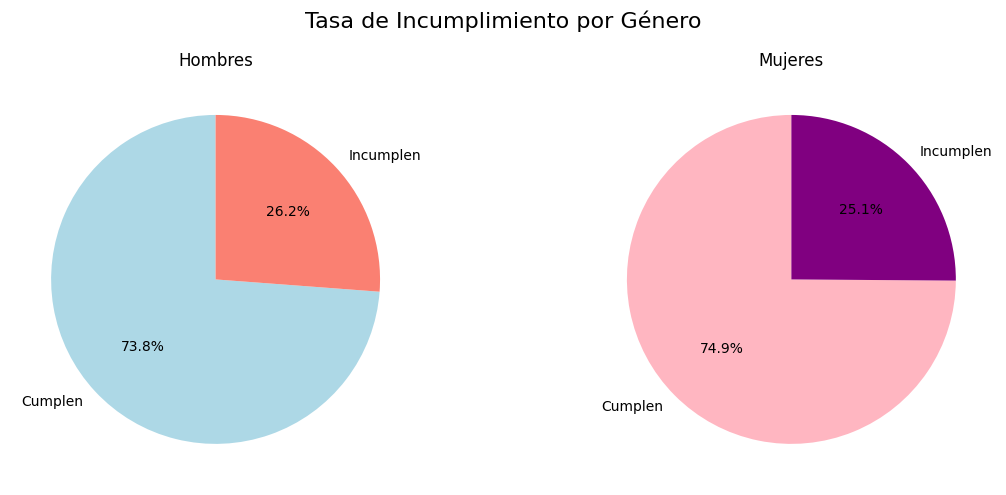

In [8]:
    # Filtrar los datos por género
    male_data = df[df['Gender'] == 'Male']
    female_data = df[df['Gender'] == 'Female']

    # Calcular las proporciones de incumplimiento (Status = 1) y cumplimiento (Status = 0)
    male_status_counts = male_data['Status'].value_counts(normalize=True)
    female_status_counts = female_data['Status'].value_counts(normalize=True)

    # Crear un subplot con dos gráficos de torta
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Gráfico de torta para género masculino
    axes[0].pie(
        male_status_counts,
        labels=['Cumplen', 'Incumplen'] if 0 in male_status_counts.index else ['Incumplen'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightblue', 'salmon']
    )
    axes[0].set_title('Hombres')

    # Gráfico de torta para género femenino
    axes[1].pie(
        female_status_counts,
        labels=['Cumplen', 'Incumplen'] if 0 in female_status_counts.index else ['Incumplen'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightpink', 'purple']
    )
    axes[1].set_title('Mujeres')

    # Título general para los gráficos
    plt.suptitle('Tasa de Incumplimiento por Género', fontsize=16)
    plt.tight_layout()
    plt.show()



La tasa de incumplimiento es minimamente mayor en los hombres con 1.1%

### 2 - La morosidad varía de acuerdo con el monto del préstamo?

In [9]:
# Asegurar salida en el notebook
output_notebook()

# Verificar que las columnas necesarias existan
if 'loan_amount' in df.columns and 'Status' in df.columns:
    # Crear rangos de montos del préstamo
    bins = [0, 5000, 10000, 20000, 50000, 100000, 200000, 500000]
    labels = ['0-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '100k-200k', '200k+']
    df['LoanRange'] = pd.cut(df['loan_amount'], bins=bins, labels=labels, include_lowest=True)

    # Calcular la proporción de morosidad en cada rango de monto
    default_rate = df[df['Status'] == 1].groupby('LoanRange', observed=True).size() / df.groupby('LoanRange', observed=True).size()

    # Limpiar los valores NaN (en caso de rangos sin datos)
    default_rate = default_rate.dropna()

    # Crear un ColumnDataSource para Bokeh
    source = ColumnDataSource(data={
        'LoanRange': default_rate.index.astype(str),
        'DefaultRate': default_rate.values
    })

    # Crear el gráfico con Bokeh
    p = figure(
        title='Tasa de Morosidad por Rango de Monto del Préstamo',
        x_range=list(default_rate.index.astype(str)),
        height=400,
        width=700,
        toolbar_location=None,
        tools=""
    )

    # Añadir una línea al gráfico
    p.line(x='LoanRange', y='DefaultRate', source=source, line_width=2, color='blue', legend_label='Tasa de Morosidad')

    # Añadir puntos al gráfico usando scatter en lugar de circle
    p.scatter(x='LoanRange', y='DefaultRate', source=source, size=10, color='red', legend_label='Tasa de Morosidad')

    # Añadir una herramienta de hover
    hover = HoverTool()
    hover.tooltips = [
        ("Rango de Monto", "@LoanRange"),
        ("Tasa de Morosidad", "@DefaultRate{0.00%}")
    ]
    p.add_tools(hover)

    # Configurar etiquetas y diseño
    p.xaxis.axis_label = "Rango de Monto del Préstamo"
    p.yaxis.axis_label = "Tasa de Morosidad"
    p.yaxis.formatter.use_scientific = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_alpha = 0.6

    # Mostrar el gráfico
    show(p)


En conclusión, la tasa de morosidad disminuye a medida que el monto del préstamo es mayor.  


### 3 - La morosidad aumenta con la tasa de interés?

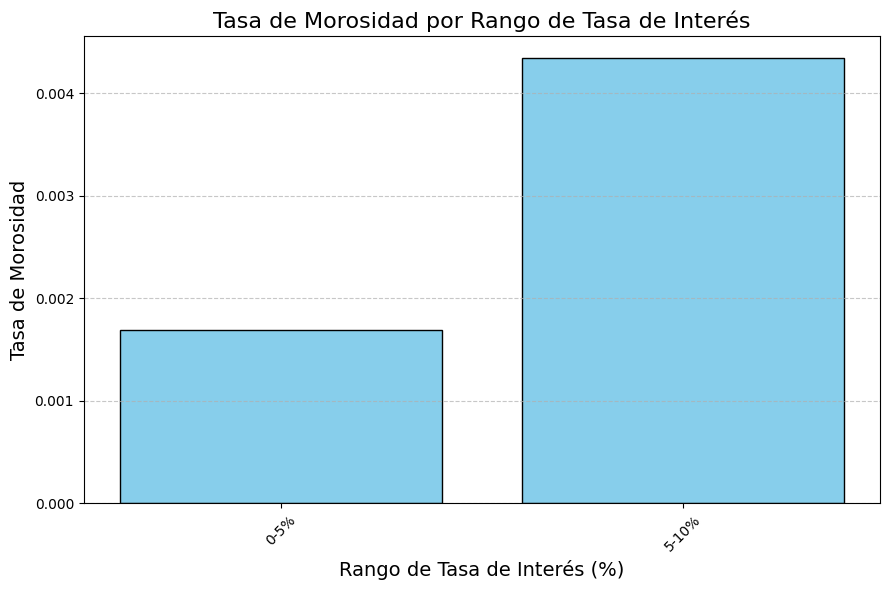

In [10]:
# Verificar que las columnas necesarias existan
if 'rate_of_interest' in df.columns and 'Status' in df.columns:
    # Crear rangos de tasas de interés
    bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
    labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%', '30-35%', '35-40%']
    df['InterestRange'] = pd.cut(df['rate_of_interest'], bins=bins, labels=labels)

    # Calcular la proporción de morosidad en cada rango de tasa de interés
    default_rate = df[df['Status'] == 1].groupby('InterestRange', observed=False).size() / df.groupby('InterestRange', observed=False).size()

    # Limpiar los valores NaN (en caso de rangos sin datos)
    default_rate = default_rate.dropna()

    # Crear el gráfico de barras con Matplotlib
    plt.figure(figsize=(9, 6))
    plt.bar(default_rate.index.astype(str), default_rate.values, color='skyblue', edgecolor='black')

    # Configurar etiquetas y títulos
    plt.title('Tasa de Morosidad por Rango de Tasa de Interés', fontsize=16)
    plt.xlabel('Rango de Tasa de Interés (%)', fontsize=14)
    plt.ylabel('Tasa de Morosidad', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()



La tasa de morosidad aumenta minimamente con una mayor tasa de interés.

### 4 - Los solicitantes con ingresos más bajos presentan una mayor tasa de incumplimiento en comparación con aquellos con ingresos más altos?

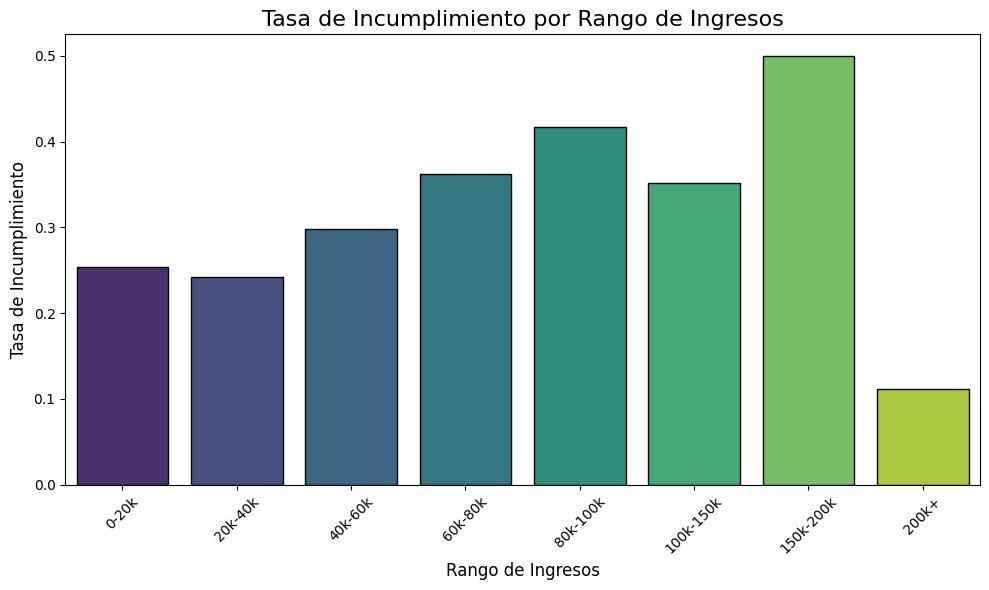

In [11]:
# Suprimir advertencias de pandas
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Verificar que las columnas necesarias existan
if 'income' in df.columns and 'Status' in df.columns:
    # Crear rangos de ingresos
    bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, 200000, 500000]
    labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-150k', '150k-200k', '200k+']
    df['IncomeRange'] = pd.cut(df['income'], bins=bins, labels=labels, include_lowest=True)

    # Calcular la tasa de incumplimiento por rango de ingresos
    income_default_rate = df[df['Status'] == 1].groupby('IncomeRange').size() / df.groupby('IncomeRange').size()

    # Limpiar los valores NaN (en caso de rangos sin datos)
    income_default_rate = income_default_rate.dropna().reset_index()
    income_default_rate.columns = ['IncomeRange', 'DefaultRate']

    # Graficar con Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(data=income_default_rate, x='IncomeRange', y='DefaultRate', palette='viridis', edgecolor='black')

    plt.title('Tasa de Incumplimiento por Rango de Ingresos', fontsize=16)
    plt.xlabel('Rango de Ingresos', fontsize=12)
    plt.ylabel('Tasa de Incumplimiento', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()



Podemos observar que existe una mayor tasa de incumplimiento en comparación de solicitantes de menores ingresos con los de mayores ingresos.


### 5 - La tasa de incumplimiento varía según la duración del préstamo (plazo en meses o años)

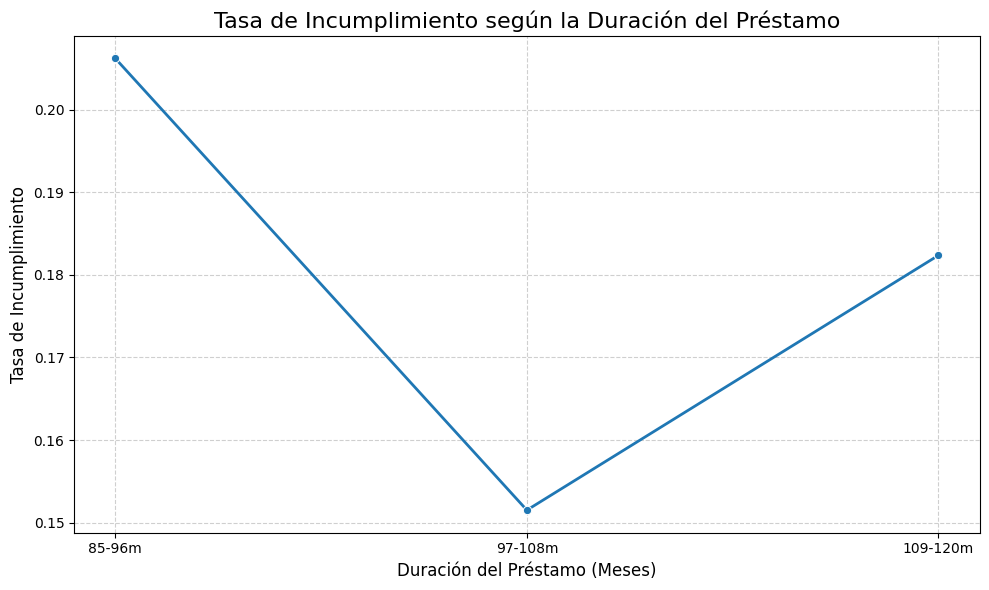

In [12]:
# Verificar si las columnas necesarias existen
if 'term' in df.columns and 'Status' in df.columns:

    # 1. Crear rangos de duración del préstamo (term)
    bins = [0, 60, 84, 96, 108, 120]  # Ejemplo: Rangos de 1 año, 2 años, etc.
    labels = ['0-60m', '61-84m', '85-96m', '97-108m', '109-120m']
    df['TermRange'] = pd.cut(df['term'], bins=bins, labels=labels)

    # 2. Calcular la tasa de incumplimiento por rango de duración
    default_rate_by_term = (
        df[df['Status'] == 1]  # Filtrar solo incumplimientos
        .groupby('TermRange', observed=True).size() / df.groupby('TermRange', observed=True).size()
    ).reset_index(name='DefaultRate')

    # 3. Graficar con Seaborn - Gráfico de Líneas
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=default_rate_by_term, x='TermRange', y='DefaultRate', marker='o', linewidth=2)

    # Personalización del gráfico
    plt.title('Tasa de Incumplimiento según la Duración del Préstamo', fontsize=16)
    plt.xlabel('Duración del Préstamo (Meses)', fontsize=12)
    plt.ylabel('Tasa de Incumplimiento', fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


La tasa de incumplimiento aparece recien entre los meses 85 y 96 con un casi 22%, luego cae un 7% en los meses 97 y 108. Y entre los últimos 109 a 120 meses se acomoda en un termino medio de un 18%.

### 6 - Los préstamos destinados a diferentes propósitos tienen tasas de incumplimiento distintas?.

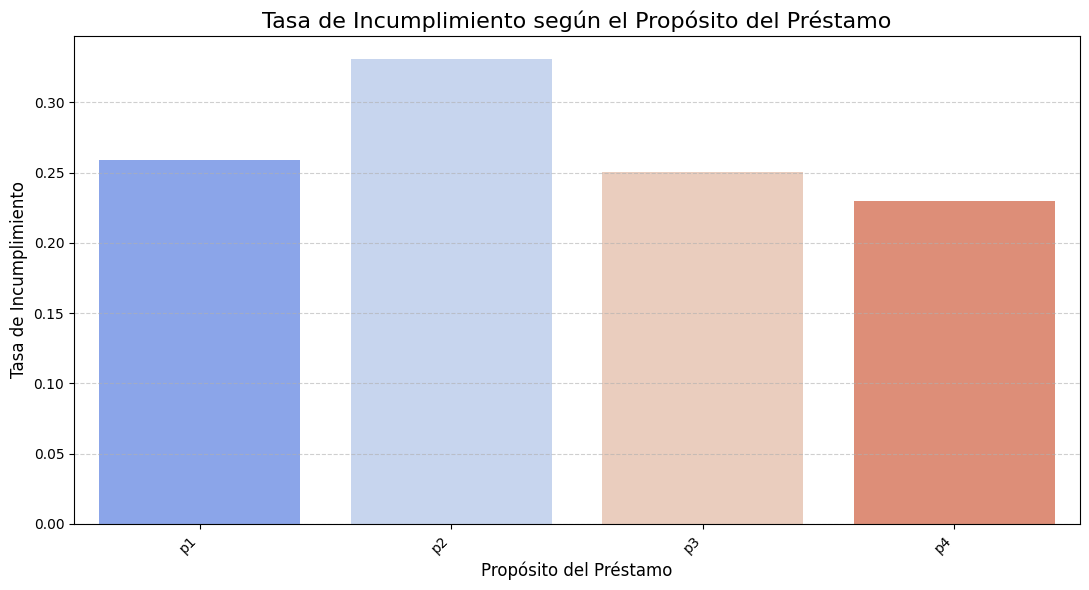

In [13]:
# Verificar si las columnas necesarias existen
if 'loan_purpose' in df.columns and 'Status' in df.columns:

    # 1. Contar la frecuencia de incumplimientos por propósito del préstamo
    loan_purpose_status = (
        df[df['Status'] == 1]  # Filtrar solo los préstamos incumplidos
        .groupby('loan_purpose').size()  # Contar por propósito
        / df.groupby('loan_purpose').size()  # Dividir por el total de cada propósito
    ).reset_index(name='DefaultRate')  # Crear un DataFrame con la tasa de incumplimiento

    # 2. Graficar con Seaborn - Gráfico de Barras
    plt.figure(figsize=(11, 6))
    sns.barplot(
        data=loan_purpose_status,
        x='loan_purpose',
        y='DefaultRate',
        dodge=False,         # Evitar barras desplazadas
        palette='coolwarm'
    )

    # Desactivamos la leyenda manualmente ya que no es necesaria
    plt.legend([], [], frameon=False)

    # Personalización del gráfico
    plt.title('Tasa de Incumplimiento según el Propósito del Préstamo', fontsize=16)
    plt.xlabel('Propósito del Préstamo', fontsize=12)
    plt.ylabel('Tasa de Incumplimiento', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


Podemos ver que la tasa de incumplimiento varia mínimamente entre los distintos propósitos de prestamos, situada en un promedio del 25%.

-----

## Preprocesamiento de Datos

En esta sección, realizamos tareas de limpieza y preparación de datos para que estén listos para la construcción de modelos.

Manejo de Valores Faltantes: Identificamos y tratamos los valores faltantes en las columnas relevantes.

Codificación de Variables Categóricas: Convertimos variables categóricas en formato numérico, encoding.

Realizamos la normalizacion.

División de Datos: Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba.



###Manejo de Valores Faltantes: Identificamos y tratamos los valores faltantes en las columnas relevantes.

<Axes: >

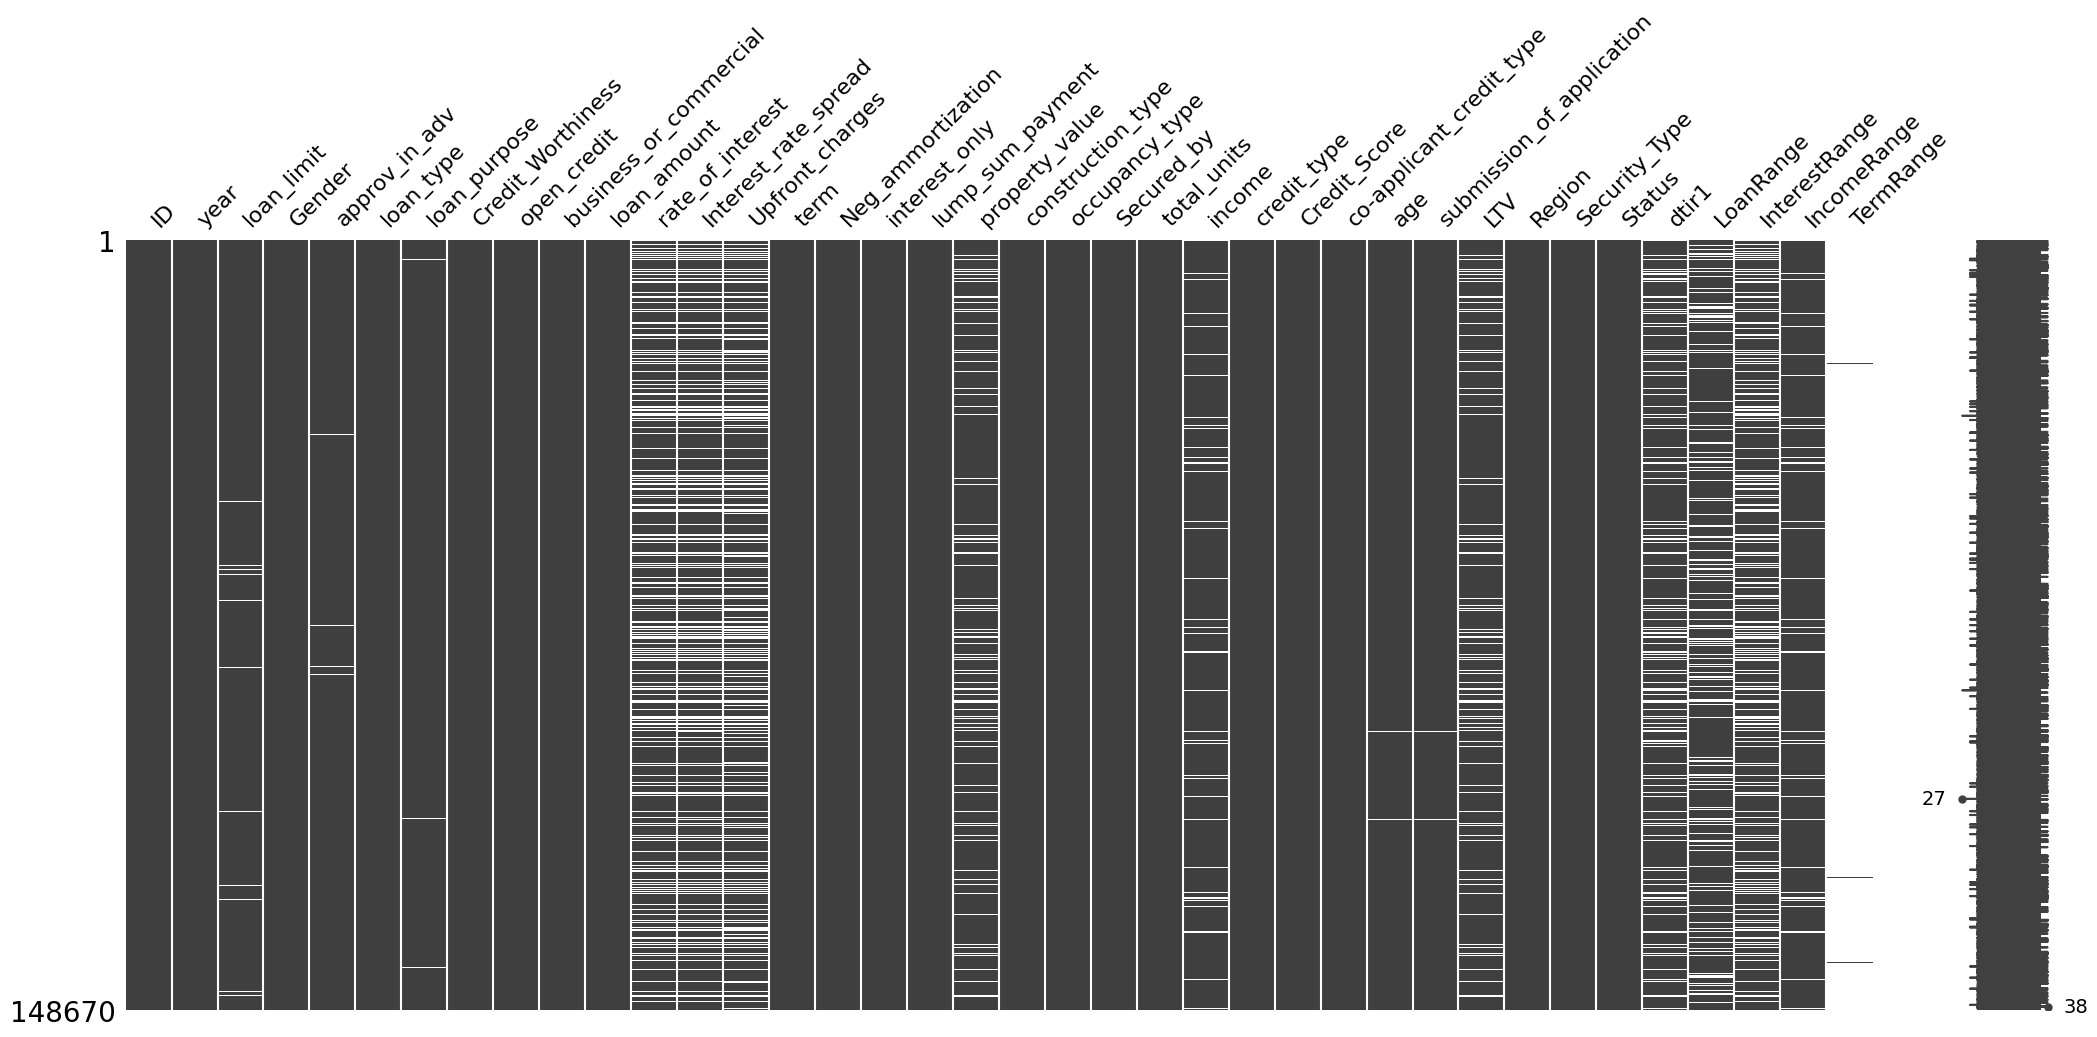

In [14]:
%matplotlib inline
msno.matrix(df)

In [15]:
# contar el numero de nulos
df.isnull().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [16]:
#1. Reemplazar valores nulos con la **media** (columnas numéricas)
media_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = media_imputer.fit_transform(df[numeric_columns])

print("\nValores nulos después de reemplazar con la media:")
print(df.isnull().sum())



Valores nulos después de reemplazar con la media:
ID                                0
year                              0
loan_limit                     3344
Gender                            0
approv_in_adv                   908
loan_type                         0
loan_purpose                    134
Credit_Worthiness                 0
open_credit                       0
business_or_commercial            0
loan_amount                       0
rate_of_interest                  0
Interest_rate_spread              0
Upfront_charges                   0
term                              0
Neg_ammortization               121
interest_only                     0
lump_sum_payment                  0
property_value                    0
construction_type                 0
occupancy_type                    0
Secured_by                        0
total_units                       0
income                            0
credit_type                       0
Credit_Score                      0
co-applicant_

In [17]:
#2. Reemplazar valores nulos con la **moda** (columnas categóricas)
moda_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df[categorical_columns] = moda_imputer.fit_transform(df[categorical_columns])

print("\nValores nulos después de reemplazar con la moda:")
print(df.isnull().sum())



Valores nulos después de reemplazar con la moda:
ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region              

### Normalizacion - Encoder

In [18]:
def preprocesar_data(data):
    """
    Función para preprocesar los datos del dataset.
    - Aplica One Hot Encoding a variables categóricas con <= 8 categorías.
    - Aplica Label Encoding a variables categóricas con > 8 categorías.
    - Normaliza las variables numéricas según el skewness.
    """
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

    # Inicializar transformadores
    onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
    label_encoder = LabelEncoder()
    scaler = MinMaxScaler()

    # Identificar columnas categóricas y numéricas
    categorias = data.select_dtypes(include=['object', 'category']).columns
    numericas = data.select_dtypes(include=['float64', 'int64']).columns

    # Procesar columnas categóricas
    for col in categorias:
        if col in data.columns:  # Verificar que la columna existe
            if data[col].nunique() <= 8:  # Si tiene 8 categorías o menos
                encoded = pd.get_dummies(data[col], prefix=col, drop_first=True)
                data = pd.concat([data, encoded], axis=1)
                data.drop(columns=[col], inplace=True)
            else:  # Si tiene más de 8 categorías
                data[col] = label_encoder.fit_transform(data[col].astype(str))

    # Procesar columnas numéricas
    for col in numericas:
        if col in data.columns:  # Verificar que la columna existe
            if data[col].isnull().sum() > 0:
                data[col].fillna(data[col].mean(), inplace=True)  # Imputar valores nulos con la media

            # Normalizar datos numéricos con MinMaxScaler
            data[col] = scaler.fit_transform(data[[col]])

    return data



In [19]:
df = preprocesar_data(df)

### División de Datos: Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba.


In [28]:
# Fijar la semilla global
semilla = 148669

# X será todo menos la columna 'Status' (la target)
X = df.drop(columns=['Status'])

# y será la columna 'Status' (la target)
y = df['Status']

# Realizamos el split 70/30 con semilla
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=semilla, stratify=y
)

# Verificamos el tamaño de los datos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (104069, 64)
Tamaño de X_test: (44601, 64)
Tamaño de y_train: (104069,)
Tamaño de y_test: (44601,)


---

## Construcción de Modelos

En esta sección, construimos modelos de clasificación utilizando el conjunto de datos preparado.

Selección de Algoritmos: Elegimos algoritmos de clasificación adecuados (por ejemplo, Regresión Logística, Random Forest).

Entrenamiento de Modelos: Entrenamos modelos utilizando el conjunto de entrenamiento.


Division de Datos

In [29]:
# Crear DataFrame para guardar los resultados
column_names = ["Modelo", "Accuracy", "Precision", "Recall", "ROCAUC", "F1-Score", "Tiempo"]
resultados_df = pd.DataFrame(columns=column_names)


In [30]:
# Función para guardar los resultados
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)

    # Crear un diccionario con los resultados
    resultados_dict = {
        'Modelo': nombre_modelo,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROCAUC': rocauc,
        'F1-Score': f1,
        'Tiempo': tiempo_ejecucion
    }

    # Agregar resultados al DataFrame global
    global resultados_df
    resultados_df = pd.concat([resultados_df, pd.DataFrame([resultados_dict])], ignore_index=True)


Funcion para Matriz de Confusion

In [31]:
# Función para graficar la matriz de confusión
def matriz_confusion(y_test, y_pred):
    from sklearn.metrics import confusion_matrix

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Matriz de confusión sin normalizar
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix,
                xticklabels=['OK (P)', 'Default (P)'],
                yticklabels=['OK', 'Default'],
                annot=True, fmt='d', ax=ax[0], cmap='Blues')
    ax[0].set_title('Sin Normalizar')
    ax[0].set_xlabel('Predicción')
    ax[0].set_ylabel('Clase Verdadera')

    # Matriz de confusión normalizada
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    sns.heatmap(conf_matrix_norm,
                xticklabels=['OK (P)', 'Default (P)'],
                yticklabels=['OK', 'Default'],
                annot=True, fmt='.2%', ax=ax[1], cmap='Blues')
    ax[1].set_title('Normalizada')
    ax[1].set_xlabel('Predicción')
    ax[1].set_ylabel('Clase Verdadera')

    # Título general
    plt.suptitle('Matriz de Confusión')
    plt.tight_layout()
    plt.show()


#### Regresion Logistica


Resultados del modelo: LogisticRegression
Accuracy: 0.8666
Precision: 0.9386
Recall: 0.4908
F1-Score: 0.6446
ROC-AUC: 0.7402


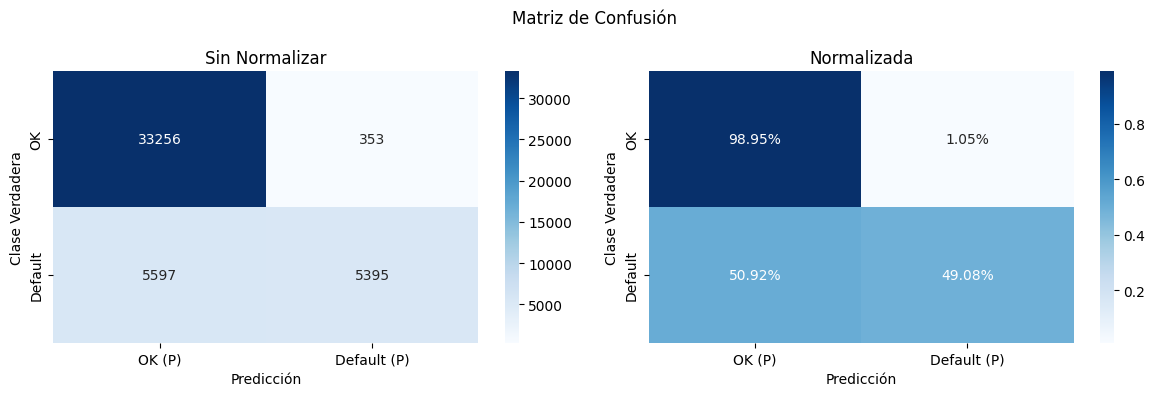

Modelo LogisticRegression entrenado en 4.33 segundos.



In [32]:
# Importar la clase LogisticRegression
from sklearn.linear_model import LogisticRegression

# Función para entrenar un modelo
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test):
    import time
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

    start_time = time.time()

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = modelo.predict(X_test)

    # Calcular tiempo de ejecución
    tiempo_ejecucion = time.time() - start_time

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)

    # Mostrar resultados del modelo
    print(f"\nResultados del modelo: {nombre_modelo}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {rocauc:.4f}")

    # Guardar resultados
    guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    # Graficar la matriz de confusión
    matriz_confusion(y_test, y_pred)

    print(f"Modelo {nombre_modelo} entrenado en {tiempo_ejecucion:.2f} segundos.\n")

# Definir el modelo de Regresión Logística
modelo = LogisticRegression(solver='liblinear', random_state=semilla)

# Entrenar el modelo
entrenar_modelo(modelo, 'LogisticRegression', X_train, y_train, X_test, y_test)


#### Random Forest


Resultados del modelo: Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000


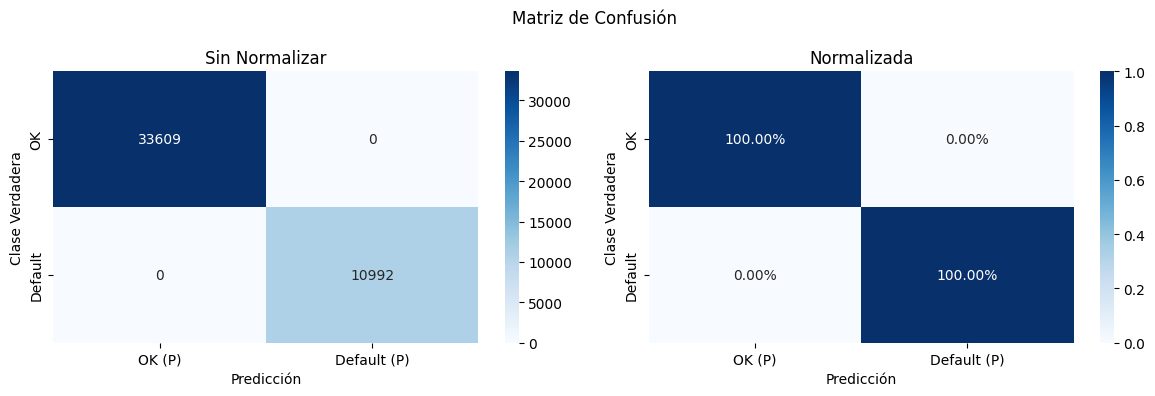

Modelo Random Forest entrenado en 10.42 segundos.



In [33]:
# Función para entrenar un modelo
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test):
    import time
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

    start_time = time.time()

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = modelo.predict(X_test)

    # Calcular tiempo de ejecución
    tiempo_ejecucion = time.time() - start_time

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)

    # Mostrar Metricas de resultados del modelo
    print(f"\nResultados del modelo: {nombre_modelo}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {rocauc:.4f}")

    # Guardar resultados
    guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    # Graficar la matriz de confusión
    matriz_confusion(y_test, y_pred)

    print(f"Modelo {nombre_modelo} entrenado en {tiempo_ejecucion:.2f} segundos.\n")

# Definir el modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(random_state=semilla, n_estimators=100)

# Entrenar el modelo
entrenar_modelo(modelo, 'Random Forest', X_train, y_train, X_test, y_test)


#### Arbol de Decision


Resultados del modelo: Árbol de Decisión
Accuracy: 1.0000
Precision: 0.9999
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000


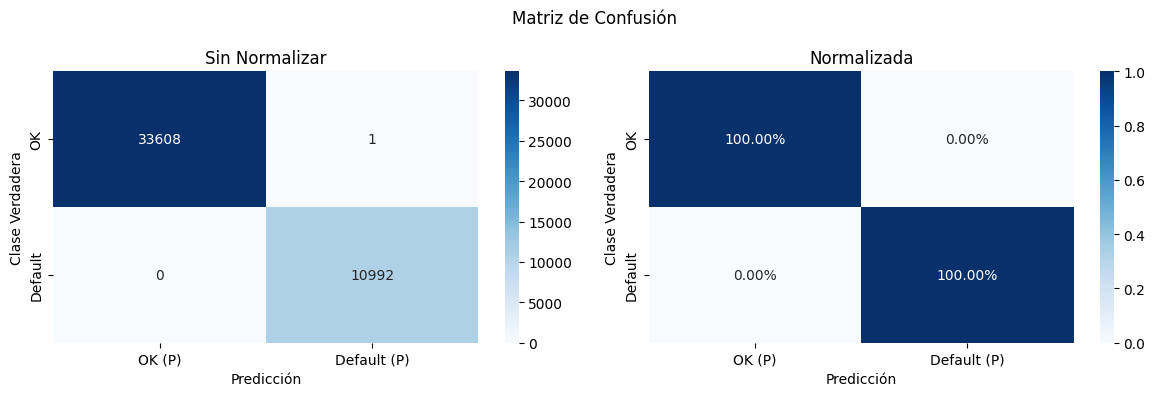

Modelo Árbol de Decisión entrenado en 0.41 segundos.



In [34]:
# Función para entrenar un modelo
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test):
    import time
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

    start_time = time.time()

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = modelo.predict(X_test)

    # Calcular tiempo de ejecución
    tiempo_ejecucion = time.time() - start_time

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)

    # Mostrar Metricas de resultados del modelo
    print(f"\nResultados del modelo: {nombre_modelo}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {rocauc:.4f}")

    # Guardar resultados
    guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    # Graficar la matriz de confusión
    matriz_confusion(y_test, y_pred)

    print(f"Modelo {nombre_modelo} entrenado en {tiempo_ejecucion:.2f} segundos.\n")

# Definir el modelo de Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(random_state=semilla)

# Entrenar el modelo
entrenar_modelo(modelo, 'Árbol de Decisión', X_train, y_train, X_test, y_test)


In [35]:
resultados_df

,Modelo,Accuracy,Precision,Recall,ROCAUC,F1-Score,Tiempo
0,LogisticRegression,0.866595,0.938587,0.490811,0.740154,0.644564,4.331839
1,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,10.421660
2,Árbol de Decisión,0.999978,0.999909,1.000000,0.999985,0.999955,0.406232


## Conclusiones Generales

### Resumen de los datos obtenidos:

**Rendimiento Global:**

Los modelos basados en árboles (Random Forest y Árbol de Decisión) superan significativamente a la Regresión Logística en todas las métricas. Esto los hace más adecuados para tareas donde la clasificación precisa de Default es esencial.

**Sobreajuste:**

Los resultados perfectos de Random Forest y Árbol de Decisión podrían ser indicativos de sobreajuste. Se recomienda realizar validaciones cruzadas y pruebas en conjuntos de datos más diversos para confirmar la generalización.

**Uso Potencial:**

Regresión Logística: Útil para aplicaciones rápidas donde la simplicidad es prioritaria y la interpretabilidad es suficiente.

Random Forest: Ideal para situaciones críticas que requieren alta precisión y sensibilidad, aunque con un costo computacional mayor.

Árbol de Decisión: Excelente opción si se busca un modelo interpretable con un desempeño casi perfecto.

### Recomendaciones sobre los modelos:

**Regresión Logística:**

Mejoras potenciales:
Realizar ajustes en el modelo para mejorar el Recall, como regularización o ajustar el umbral de clasificación.

Aplicar técnicas de manejo de datos desbalanceados, como el sobremuestreo de la clase minoritaria (Default) o el uso de pesos en las clases.


**Random Forest:**

Mejoras potenciales:
Realizar validación cruzada para asegurar que los resultados perfectos no se deban a sobreajuste.

Ajustar hiperparámetros como el número de árboles, la profundidad máxima, y los criterios de división para encontrar un mejor equilibrio entre precisión y generalización.


**Árbol de Decisión:**

Mejoras potenciales:
Limitar la profundidad máxima del árbol para prevenir sobreajuste, especialmente si los datos de prueba no son representativos.

Evaluar la importancia de las características para simplificar aún más el modelo y priorizar interpretabilidad.


**Pruebas con modelos adicionales:**

Considerar probar otros modelos para comparar su rendimiento y ver si se pueden obtener mejores resultados.

---